In [1]:
import tensorflow as tf

In [2]:
(train_features, train_target),(test_features, test_target)=tf.keras.datasets.cifar10.load_data()

In [3]:
train_features = train_features/255 # Normalization

In [4]:
import matplotlib.pyplot as plt

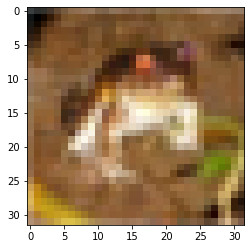

In [5]:
plt.imshow(train_features[0])
plt.show()

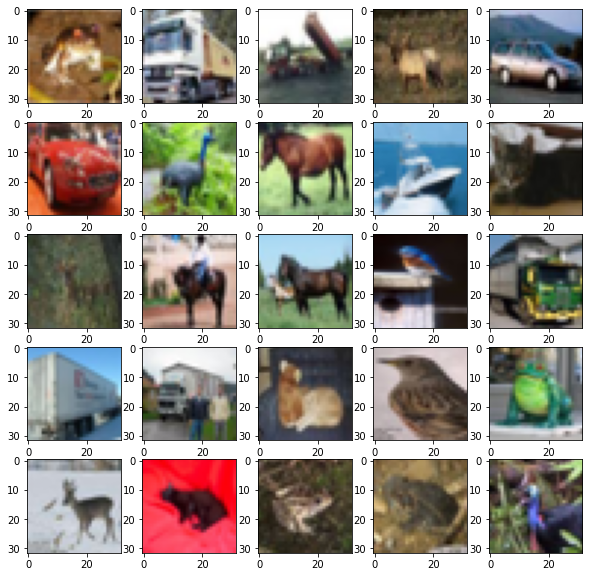

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_features[i])
    
plt.show()

Labels:

    0 -- airplane
    1 -- automoible
    2 -- bird
    3 -- cat
    4 -- deer
    5 -- dog
    6 -- frog
    7 -- horse
    8 -- ship
    9 -- truck

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
train_target = to_categorical(train_target)

In [9]:
train_target.shape

(50000, 10)

In [10]:
train_features.shape

(50000, 32, 32, 3)

# Step 1: Specify the architecture

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10, activation="softmax"))

# Step 2: Compile the model

In [13]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# Step 3: Train the model

In [14]:
model.fit(train_features,train_target,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 29ms/step - loss: 1.7285 - accuracy: 0.3589
Epoch 2/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1843 - accuracy: 0.5820
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9961 - accuracy: 0.6469
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8901 - accuracy: 0.6854
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8109 - accuracy: 0.7133
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7470 - accuracy: 0.7393
Epoch 7/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.6946 - accuracy: 0.7588
Epoch 8/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6393 - accuracy: 0.7757
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5985 - accuracy: 0.7870
Epoch 10/10
1563/1563 [==============================] - 42s 27m

In [15]:
predictions = model.predict(test_features)

In [18]:
predictions[0]

array([0.        , 0.        , 0.        , 0.00205625, 0.        ,
       0.9979437 , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)